In [70]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import function
from sklearn.preprocessing import MinMaxScaler

In [71]:
df = pd.read_excel('../VisitorEntrancesV3.xlsx')

In [72]:
df = df[df.Site_Name=='En Gedi']
df = function.remove_unique_one(df)
df = df.drop(df.filter(regex='Season').columns, axis=1)
df = df.drop(df.filter(regex='Exceeded').columns, axis=1)
df = df.drop(df.filter(regex='isHeatwave').columns, axis=1)
df = df.replace({True:1,False:0})

In [73]:
dfWithoutLastYearVisits = df.drop('last_year_visitors',axis=1)
dfLastYearVisits = df.dropna()

In [74]:
print(dfLastYearVisits.shape)
print(dfWithoutLastYearVisits.shape)

(1002, 8)
(1381, 7)


In [75]:
def mlrModelResTrainTestCoeff(dataframe,shaffle=False):
    dataframe.dropna(inplace=True)
    dataframe.sort_values('Date')
    y = dataframe[['Date','Israelis_Count']]
    X = dataframe.drop('Israelis_Count',axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=shaffle, test_size = 0.2, random_state=312148513)

    X_train_scaler = MinMaxScaler()
    X_test_scaler = MinMaxScaler()

    X_train_scaled = X_train_scaler.fit_transform(X_train.drop('Date',axis=1))
    X_test_scaled = X_test_scaler.fit_transform(X_test.drop('Date',axis=1))
    
    mlr = linear_model.LinearRegression()
    mlr.fit(X_train_scaled,y_train.Israelis_Count)
    
    prediction = mlr.predict(X_train_scaled)
    resTrain =  pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_train.Israelis_Count.values    },
        index=y_train.Date
    )
    
    prediction = mlr.predict(X_test_scaled)
    resTest = pd.DataFrame(
        data={
            'Prediction':prediction,
            'Actual': y_test.Israelis_Count.values    },
        index=y_test.Date
    )
    coef = sorted( list(zip(np.round(mlr.coef_,5).T,X_train.drop("Date",axis=1).columns)))
    d = {}
    for tup in coef:
        d[tup[-1]] = tup[0]
    coefDF = pd.DataFrame.from_dict(d,orient='index')
    
    return resTrain,resTest,coefDF
    
def printRes(res ,plotLine=True ,plotResiduals = False):
    res = res.sort_index()
    print('rmse',function.get_rmse(res.Prediction, res.Actual))
    print('std',np.std(res.Actual))
    
    if plotResiduals:
        function.plot_residuals(actual=y_train.Israelis_Count,prediction=prediction)
    if plotLine:
        function.plot_line(actual=res.Actual,prediction=res.Prediction)
        
    print('Sample rows:')
    print( res.sample(10))

In [76]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfLastYearVisits)

C:\Users\Avivsa\AppData\Local\Temp\ipykernel_1084\1564167282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True)


                            0
Temperature        -581.86869
IsVacation         -119.93818
is_weekend          -78.52285
pm10                463.86356
IsHoliday           535.19772
last_year_visitors  634.38849

rmse 672.0952430773729
std 719.3264043576573


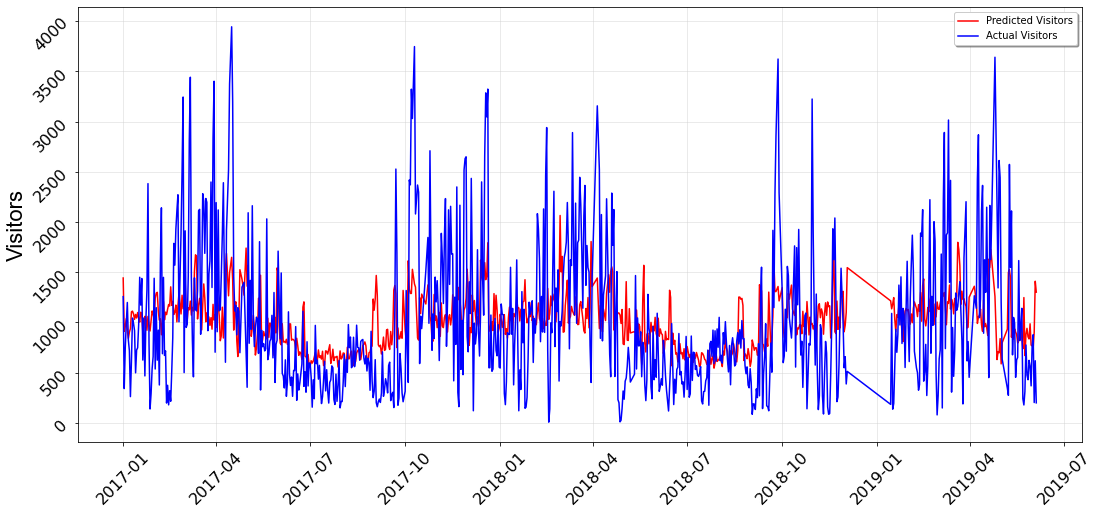

Sample rows:
             Prediction  Actual
Date                           
2019-05-21   841.363336    1141
2017-08-04   571.177796     362
2017-08-26   600.700776     644
2017-02-17  1170.188385     512
2018-07-21   577.055388     725
2017-05-01  1360.921641     355
2018-01-27   996.210186     254
2018-07-23   667.255853     788
2018-08-14   696.902856     848
2018-08-12   717.470977     380

rmse 619.6994520075506
std 690.7782847249603


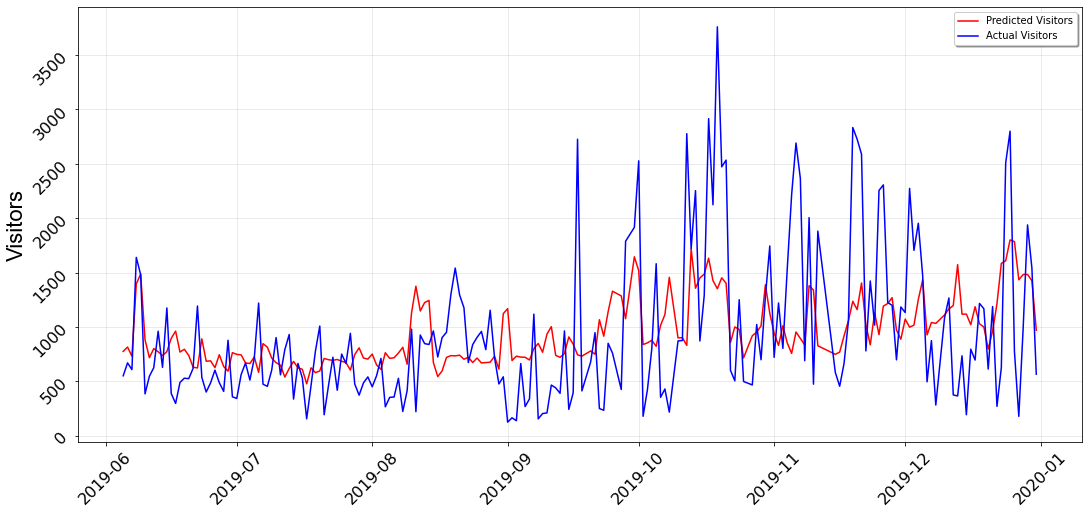

Sample rows:
             Prediction  Actual
Date                           
2019-07-04   663.105595     511
2019-06-19   794.380237     528
2019-08-13  1223.731177     846
2019-07-16   610.148892     531
2019-09-12   737.935538     439
2019-08-23   721.022139     672
2019-10-01  1517.029751    2527
2019-11-16   768.580302     454
2019-10-10   898.976177     871
2019-10-18  1425.487786    2123


In [77]:
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)

                     0
Temperature -443.38273
IsVacation  -239.46651
is_weekend  -101.38106
pm10         146.09181
IsHoliday    563.32548

rmse 668.8493929310384
std 708.2008142467268


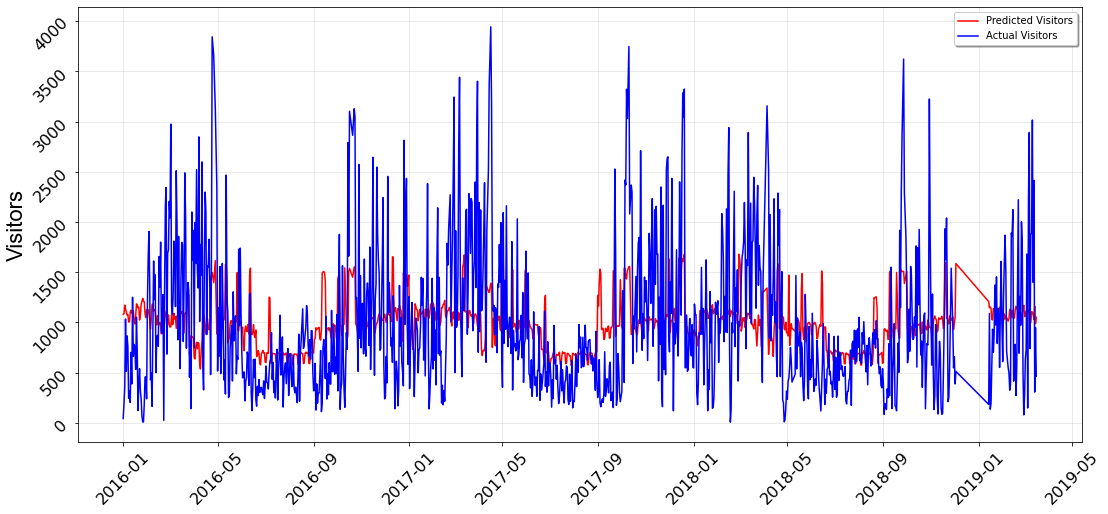

Sample rows:
             Prediction  Actual
Date                           
2018-10-03   939.178775     667
2016-01-20  1144.408195     123
2017-03-30   966.016537    3401
2018-02-25  1080.880619    1108
2016-11-29  1039.554472    2243
2018-09-15   846.634827     988
2017-01-10  1160.227466    1044
2017-10-31  1019.741337    1205
2017-07-20   700.195605     404
2017-11-29  1055.789444    2649

rmse 688.7021395134444
std 725.4174140350013


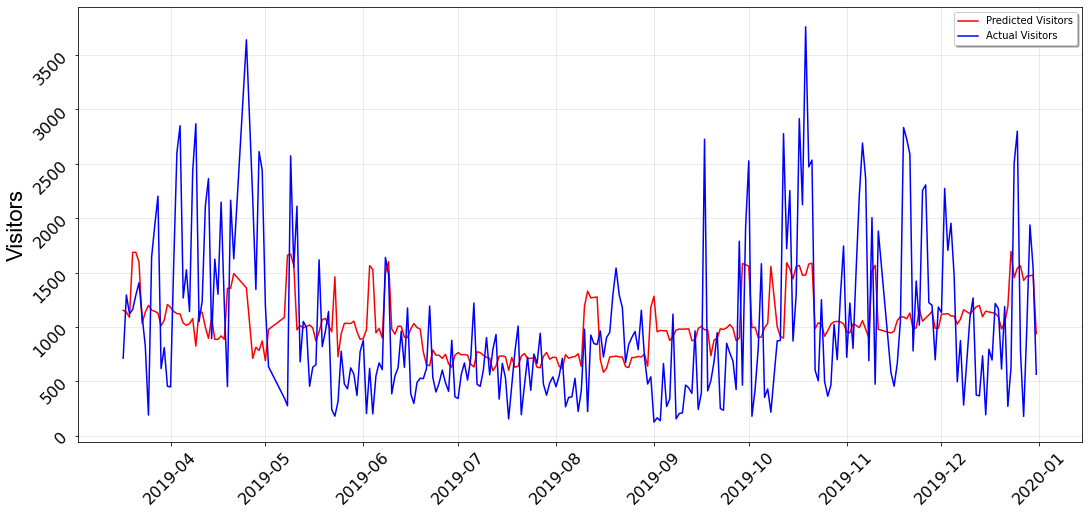

Sample rows:
             Prediction  Actual
Date                           
2019-06-04  1527.508348     200
2019-05-27  1032.472123     430
2019-09-27   873.955505     424
2019-04-01  1178.522634     448
2019-07-26   628.399266     664
2019-09-04   964.264071     663
2019-07-12   596.975067     791
2019-10-07  1031.954824     429
2019-04-12   998.065574    2109
2019-08-31  1181.005986     541


In [78]:
resTrain,resTest,coeffDf = mlrModelResTrainTestCoeff(dfEnGediWithoutLastYearVisits)
print(coeffDf)
print()

printRes(resTrain)
print()

printRes(resTest)